In [4]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X,y=make_moons(n_samples=500,noise=0.15,random_state=49)

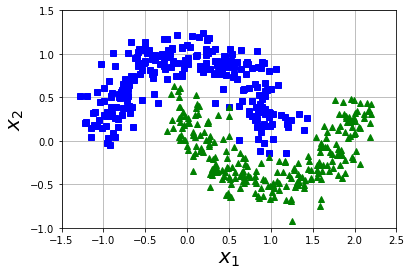

In [4]:
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True,which="both")
    plt.xlabel(r"$x_1$",fontsize=20)
    plt.ylabel(r"$x_2$",fontsize=20)
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [5]:
import matplotlib.pyplot as plt

In [22]:
def plot_svm(clf,X,y,axes=[-2,3,-2,2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data
    
    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax] 
    """
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    x0,x1=np.meshgrid(x0s,x1s)
    X_mesh=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(X_mesh)
    y_decision=clf.decision_function(X_mesh).reshape(x0.shape)
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,c="r",label="Support")
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.1)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.2)
    plt.contour(x0,x1,y_decision,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 
    #print(len(clf.support_vectors_))
    

In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm, metrics

In [16]:

y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

Classification report:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

        -1.0       0.88      0.78      0.82        45
         1.0       0.83      0.91      0.87        55

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100


Confusion matrix:
[[35 10]
 [ 5 50]]
Accuracy=0.85


TypeError: Input z must be 2D, not 1D

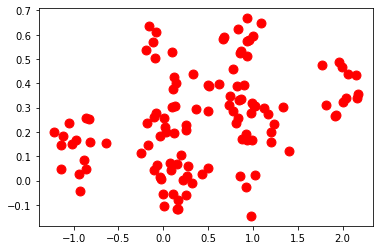

In [9]:
svm_lin=SVC(kernel="linear",C=1)
svm_lin.fit(X_train,y_train)
expected=y_test
predicted=svm_lin.predict(X_test)
cm=metrics.confusion_matrix(expected,predicted)
print("Classification report:  %s:\n%s\n" % (svm_lin,metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_lin,X,y)

Classification report:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

        -1.0       1.00      0.82      0.90        45
         1.0       0.87      1.00      0.93        55

    accuracy                           0.92       100
   macro avg       0.94      0.91      0.92       100
weighted avg       0.93      0.92      0.92       100


Confusion matrix:
[[37  8]
 [ 0 55]]
Accuracy=0.92


C:\Users\Admin\anaconda3\envs\tensoraksh\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TypeError: Input z must be 2D, not 1D

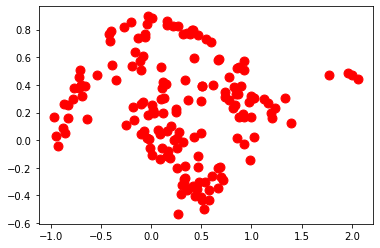

In [10]:
svm_poly=SVC(kernel="poly",C=1)
svm_poly.fit(X_train,y_train)
expected=y_test
predicted=svm_poly.predict(X_test)
cm=metrics.confusion_matrix(expected,predicted)
print("Classification report:  %s:\n%s\n" % (svm_poly,metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_poly,X,y)


Classification report: SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100


Confusion matrix:
[[37  8]
 [ 0 55]]
Accuracy=0.84


TypeError: Input z must be 2D, not 1D

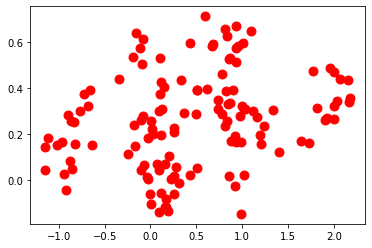

In [11]:
svm_rbf=SVC(kernel="rbf",C=2,gamma=0.1)
svm_rbf.fit(X_train,y_train)
expected=y_test
predicted=svm_rbf.predict(X_test)
print("Classification report: %s:\n%s\n" % (svm_rbf,metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_rbf,X,y)

In [8]:
from numpy import linalg

In [9]:
def linear_kernel(u,v):
    return np.dot(u,v)

In [10]:
def polynomial_kernel(u,v,p=3):
    return (np.dot(u,v)+1)**p

In [11]:
def rbf_kernel(u,v,gamma=0.1):
    return np.exp(-(gamma)*(linalg.norm(u-v)**2))

In [17]:
!pip install cvxopt

In [2]:
import cvxopt
import cvxopt.solvers
from sklearn.base import BaseEstimator,ClassifierMixin

In [18]:
class MySVM(BaseEstimator,ClassifierMixin):
    """The Implementation of the SVM class"""
    def __init__(self,kernel=linear_kernel,C=None):
        self.kernel=kernel
        self.C=C
        if self.C is not None:
            self.C=float(self.C)
    def fit(self,X,y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        m_samples,n_features=X.shape
         # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        #Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints (i.e., subject to the condition that one or more equations have to be satisfied exactly by the chosen values of the variables).
        K=np.zeros((m_samples,m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j]=self.kernel(X[i],X[j])
            P=cvxopt.matrix(np.outer(y,y)*K)
            q=cvxopt.matrix(np.ones(m_samples)*-1)
            A=cvxopt.matrix(y,(1,m_samples))
            b=cvxopt.matrix(0,0)
            if self.C is None:
                G=cvxopt.matrix(np.diag(np.ones(m_samples)*-1))
                h=cvxopt.matrix(np.zeros(m_samples))
            else:
                tmp1=np.diag(np.ones(m_samples)*-1)
                tmp2=np.identity(m_samples)
                G=cvxopt.matrix(np.vstack((tmp1,tmp2)))
                tmp1=np.zeros(m_samples)
                tmp2=np.zeros(m_samples)*self.C
                h=cvxopt.matrix(np.hstack((tmp1,tmp2)))
            solution=cvxopt.solvers.qp(P,q,G,h,A,b)
            a=np.ravel(solution["x"])
            sv=a>1e-3
            indices=[]
            for t in range(len(sv)):
                if sv[t]:
                    indices.append(t)
                    self.a=a[sv]
                    self.y_sv=y[sv]
                    self.support_vectors_=X[sv]
                    print("%d support vectors out of %d points" % (sum(sv), m_samples))
                    self.b=0
                    for k in range(sum(sv)):
                        self.b=self.b+self.y_sv[k]-np.sum(K[indices[k],sv]*self.a*self.y_sv)
                    self.b=self.b/sum(sv)
            if self.kernel==linear.kernel:
                self.w=np.zeros(n_features)
                for k in range(sum(sv)):
                    self.w=self.w+self.a[k]*self.y_sv[k]*self.support_vectors_[k]
            else:
                self.w=None
        def decision_function(self,X):
            """The decision function is essentially w^T . x + b"""
            if self.w is not None:
                return np.dot(X,self.w)+self.b
            else:
                y_predict=np.zeros(len(X))
                for i in range(len(X)):
                    sum=0
                    for j in range(len(self.support_vectors_)):
                        sum=sum+self.a[j]+self.y_sv[j]*self.kernel(X[i],self.support_vectors_[j])
                    y_predict[i]=sum+self.b
                return y_predict
            def predict(self,X):
                return np.sign(self.decision_function(X))
        

     pcost       dcost       gap    pres   dres
 0: -1.3808e+02 -8.1623e+02  4e+03  2e+00  6e-15
 1: -9.4346e+01 -4.8165e+02  6e+02  2e-01  4e-15
 2: -8.9917e+01 -1.5366e+02  8e+01  2e-02  4e-15
 3: -1.0138e+02 -1.2220e+02  2e+01  6e-03  3e-15
 4: -1.0465e+02 -1.1635e+02  1e+01  3e-03  3e-15
 5: -1.0680e+02 -1.1276e+02  6e+00  1e-03  3e-15
 6: -1.0811e+02 -1.1044e+02  2e+00  4e-04  3e-15
 7: -1.0863e+02 -1.0967e+02  1e+00  8e-05  3e-15
 8: -1.0899e+02 -1.0923e+02  3e-01  2e-05  3e-15
 9: -1.0905e+02 -1.0915e+02  1e-01  3e-06  3e-15
10: -1.0909e+02 -1.0911e+02  2e-02  5e-07  3e-15
11: -1.0910e+02 -1.0910e+02  8e-04  2e-08  3e-15
12: -1.0910e+02 -1.0910e+02  8e-06  2e-10  4e-15
Optimal solution found.
117 support vectors out of 400 points
Classification report: 
              precision    recall  f1-score   support

        -1.0       0.85      0.78      0.81        45
         1.0       0.83      0.89      0.86        55

    accuracy                           0.84       100
   macro av

TypeError: Input z must be 2D, not 1D

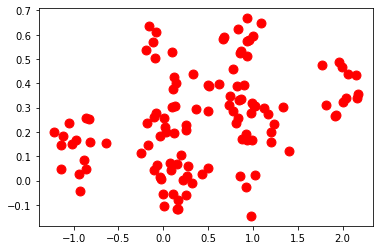

In [23]:
svm_linear=MySVM(C=1)
svm_linear.fit(X_train,y_train)
expected=y_test
predicted=svm_linear.predict(X_test)
cm = metrics.confusion_matrix(expected, predicted)
print("Classification report: \n%s\n" % (metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_linear,X,y)

In [20]:
class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        
        m_samples, n_features = X.shape

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-3
        #print(sv) sv is a boolean array of where the support vectors are
        
        # SUBTASK 3 (5 pts): Find the support vectors
        
        #this will actually give the indices of the support vectors
        indices = []
        for t in range(len(sv)):
          if sv[t]:
            indices.append(t)
        
        # need to save these as self. because we need to access them in the decision_function function
        # this 
        self.a = a[sv] #get the a^(i). founf this trick to index with a boolean array to get the array instead of using a for loop like I did above for the indices
        self.y_sv = y[sv] # get the y^(i)/y^(k) depending on the eqn
        self.support_vectors_ = X[sv]  # this will be X^(i)/X^(test)/etc. in the eqns. these are the support vectors
        

        print("%d support vectors out of %d points" % (sum(sv), m_samples))

        # SUBTASK 4 (10 pts): Compute the Intercept b
        self.b = 0
        for k in range(sum(sv)):
          #eqn from piazza post response by TA Jeffrey Yoo (did not use the eqn on the slides for this one as this seems to work and is less complicated)
          #K[] is the phi sub kernel and we feed in the indices and the support vectors booleans
          self.b = self.b + self.y_sv[k] - np.sum(K[indices[k],sv] * self.a*self.y_sv) 
        #divide by n
        self.b = self.b/sum(sv)
          

        
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            # SUBTASK 5 (10 pts): Compute the Weight vector w
            #tried using np.sum() but can't because have to add self.w at each step unlike above
            #eqn from slide 32 for w
            for k in range(sum(sv)):
              self.w = self.w + self.a[k] * self.y_sv[k] * self.support_vectors_[k]
        else:
            # No need to compute for w in non-linear case
            # Instead, we will use alpha (a) directly to predict the labels
            self.w =  None

    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            # SUBTASK 6 (25 pts): for non-linear case, implement the kernel trick to predict label here
            y_predict = np.zeros(len(X))    
            for i in range(len(X)):
              sum = 0
              for j in range(len(self.support_vectors_)):
                #eqn from slide 33 of lecture 6b we can use just the original kernel function instead of the phi sub kernel
                #in the slides there is x^(test) which "is an instance of the test data set. It's the input in this case since we want to predict the class of x(test)"
                #that doesn't make much sense to me because we are feeding x into this function, maybe I'm just misunderstanding what the slides mean by x(test) and
                #we both mean the same thing but what I have below works. I think I am doing what the slides say but just don't get why that wording is used.
                sum = sum + self.a[j] * self.y_sv[j] * self.kernel(X[i],self.support_vectors_[j])
              y_predict[i] = sum + self.b
            return y_predict

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))

     pcost       dcost       gap    pres   dres
 0: -1.3808e+02 -8.1623e+02  4e+03  2e+00  6e-15
 1: -9.4346e+01 -4.8165e+02  6e+02  2e-01  4e-15
 2: -8.9917e+01 -1.5366e+02  8e+01  2e-02  4e-15
 3: -1.0138e+02 -1.2220e+02  2e+01  6e-03  3e-15
 4: -1.0465e+02 -1.1635e+02  1e+01  3e-03  3e-15
 5: -1.0680e+02 -1.1276e+02  6e+00  1e-03  3e-15
 6: -1.0811e+02 -1.1044e+02  2e+00  4e-04  3e-15
 7: -1.0863e+02 -1.0967e+02  1e+00  8e-05  3e-15
 8: -1.0899e+02 -1.0923e+02  3e-01  2e-05  3e-15
 9: -1.0905e+02 -1.0915e+02  1e-01  3e-06  3e-15
10: -1.0909e+02 -1.0911e+02  2e-02  5e-07  3e-15
11: -1.0910e+02 -1.0910e+02  8e-04  2e-08  3e-15
12: -1.0910e+02 -1.0910e+02  8e-06  2e-10  4e-15
Optimal solution found.
117 support vectors out of 400 points
Classification report: 
              precision    recall  f1-score   support

        -1.0       0.85      0.78      0.81        45
         1.0       0.83      0.89      0.86        55

    accuracy                           0.84       100
   macro av

TypeError: Input z must be 2D, not 1D

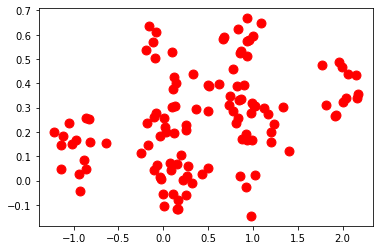

In [24]:
# Your code here
svm_linear = MySVM(C=1)
svm_linear.fit(X_train, y_train)
expected = y_test
predicted = svm_linear.predict(X_test)
cm = metrics.confusion_matrix(expected, predicted)
print("Classification report: \n%s\n" % (metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_linear,X,y)

     pcost       dcost       gap    pres   dres
 0: -7.6899e+01 -9.7084e+02  6e+03  3e+00  8e-14
 1: -4.8811e+01 -6.1518e+02  1e+03  5e-01  5e-14
 2: -2.6153e+01 -1.9759e+02  3e+02  8e-02  4e-14
 3: -2.2786e+01 -5.8759e+01  5e+01  1e-02  3e-14
 4: -2.4569e+01 -4.9901e+01  3e+01  5e-03  2e-14
 5: -2.6987e+01 -4.1757e+01  2e+01  2e-03  2e-14
 6: -2.8616e+01 -3.6738e+01  9e+00  7e-04  2e-14
 7: -3.0332e+01 -3.3125e+01  3e+00  1e-04  2e-14
 8: -3.0968e+01 -3.1969e+01  1e+00  2e-05  2e-14
 9: -3.1296e+01 -3.1546e+01  3e-01  4e-06  2e-14
10: -3.1390e+01 -3.1426e+01  4e-02  2e-07  2e-14
11: -3.1407e+01 -3.1408e+01  1e-03  7e-09  2e-14
12: -3.1407e+01 -3.1407e+01  2e-05  6e-11  2e-14
Optimal solution found.
45 support vectors out of 400 points
Classification report: 
              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg

TypeError: Input z must be 2D, not 1D

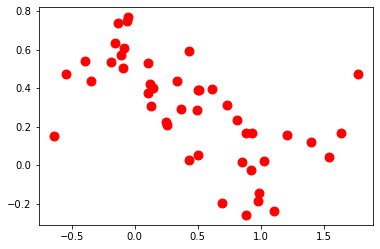

In [25]:
svm_polynomial = MySVM(kernel=polynomial_kernel,C=1)
svm_polynomial.fit(X_train, y_train)
expected = y_test
predicted = svm_polynomial.predict(X_test)
cm = metrics.confusion_matrix(expected, predicted)
print("Classification report: \n%s\n" % (metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_polynomial,X,y)

     pcost       dcost       gap    pres   dres
 0: -1.8344e+02 -1.7302e+03  5e+03  1e+00  6e-15
 1: -1.4223e+02 -6.7136e+02  5e+02  3e-16  4e-15
 2: -1.8732e+02 -2.9502e+02  1e+02  3e-15  4e-15
 3: -2.1282e+02 -2.4713e+02  3e+01  4e-16  5e-15
 4: -2.1845e+02 -2.3860e+02  2e+01  5e-15  5e-15
 5: -2.2254e+02 -2.3164e+02  9e+00  4e-15  5e-15
 6: -2.2431e+02 -2.2887e+02  5e+00  1e-15  6e-15
 7: -2.2545e+02 -2.2733e+02  2e+00  7e-16  6e-15
 8: -2.2599e+02 -2.2664e+02  6e-01  9e-15  5e-15
 9: -2.2627e+02 -2.2629e+02  2e-02  5e-15  6e-15
10: -2.2628e+02 -2.2628e+02  5e-04  2e-15  6e-15
11: -2.2628e+02 -2.2628e+02  1e-05  1e-15  6e-15
Optimal solution found.
130 support vectors out of 400 points
Classification report: 
              precision    recall  f1-score   support

        -1.0       0.88      0.78      0.82        45
         1.0       0.83      0.91      0.87        55

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weight

TypeError: Input z must be 2D, not 1D

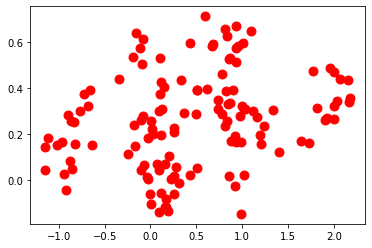

In [26]:
svm_rbfmy = MySVM(kernel=rbf_kernel,C=2)
svm_rbfmy.fit(X_train, y_train)
expected = y_test
predicted = svm_rbfmy.predict(X_test)
cm = metrics.confusion_matrix(expected, predicted)
print("Classification report: \n%s\n" % (metrics.classification_report(expected, predicted)))    
print("Confusion matrix:\n%s" % cm)
print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))
plot_svm(svm_rbfmy,X,y)